In [1]:
# importing liburaries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from scipy import stats
from imblearn.combine import SMOTEENN 
# importing all the necessary libraries to build a models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
#reading csv file to dataframe
df=pd.read_csv(r'C:\Users\M RAJESH\Downloads\archive\Dry_Bean.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
#getting info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
#checking count of null values in each column
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [5]:
# 5 point summery
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
df.shape

(13611, 17)

# LABEL ENCODING OF 'CLASS' COLUMN

In [7]:
#making dependent and independent columns seperate
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Class_y'] = lab.fit_transform(df['Class'])
x=df.drop(['Class','Class_y'],axis=1)
y1=df['Class_y']

In [8]:
df.shape

(13611, 18)

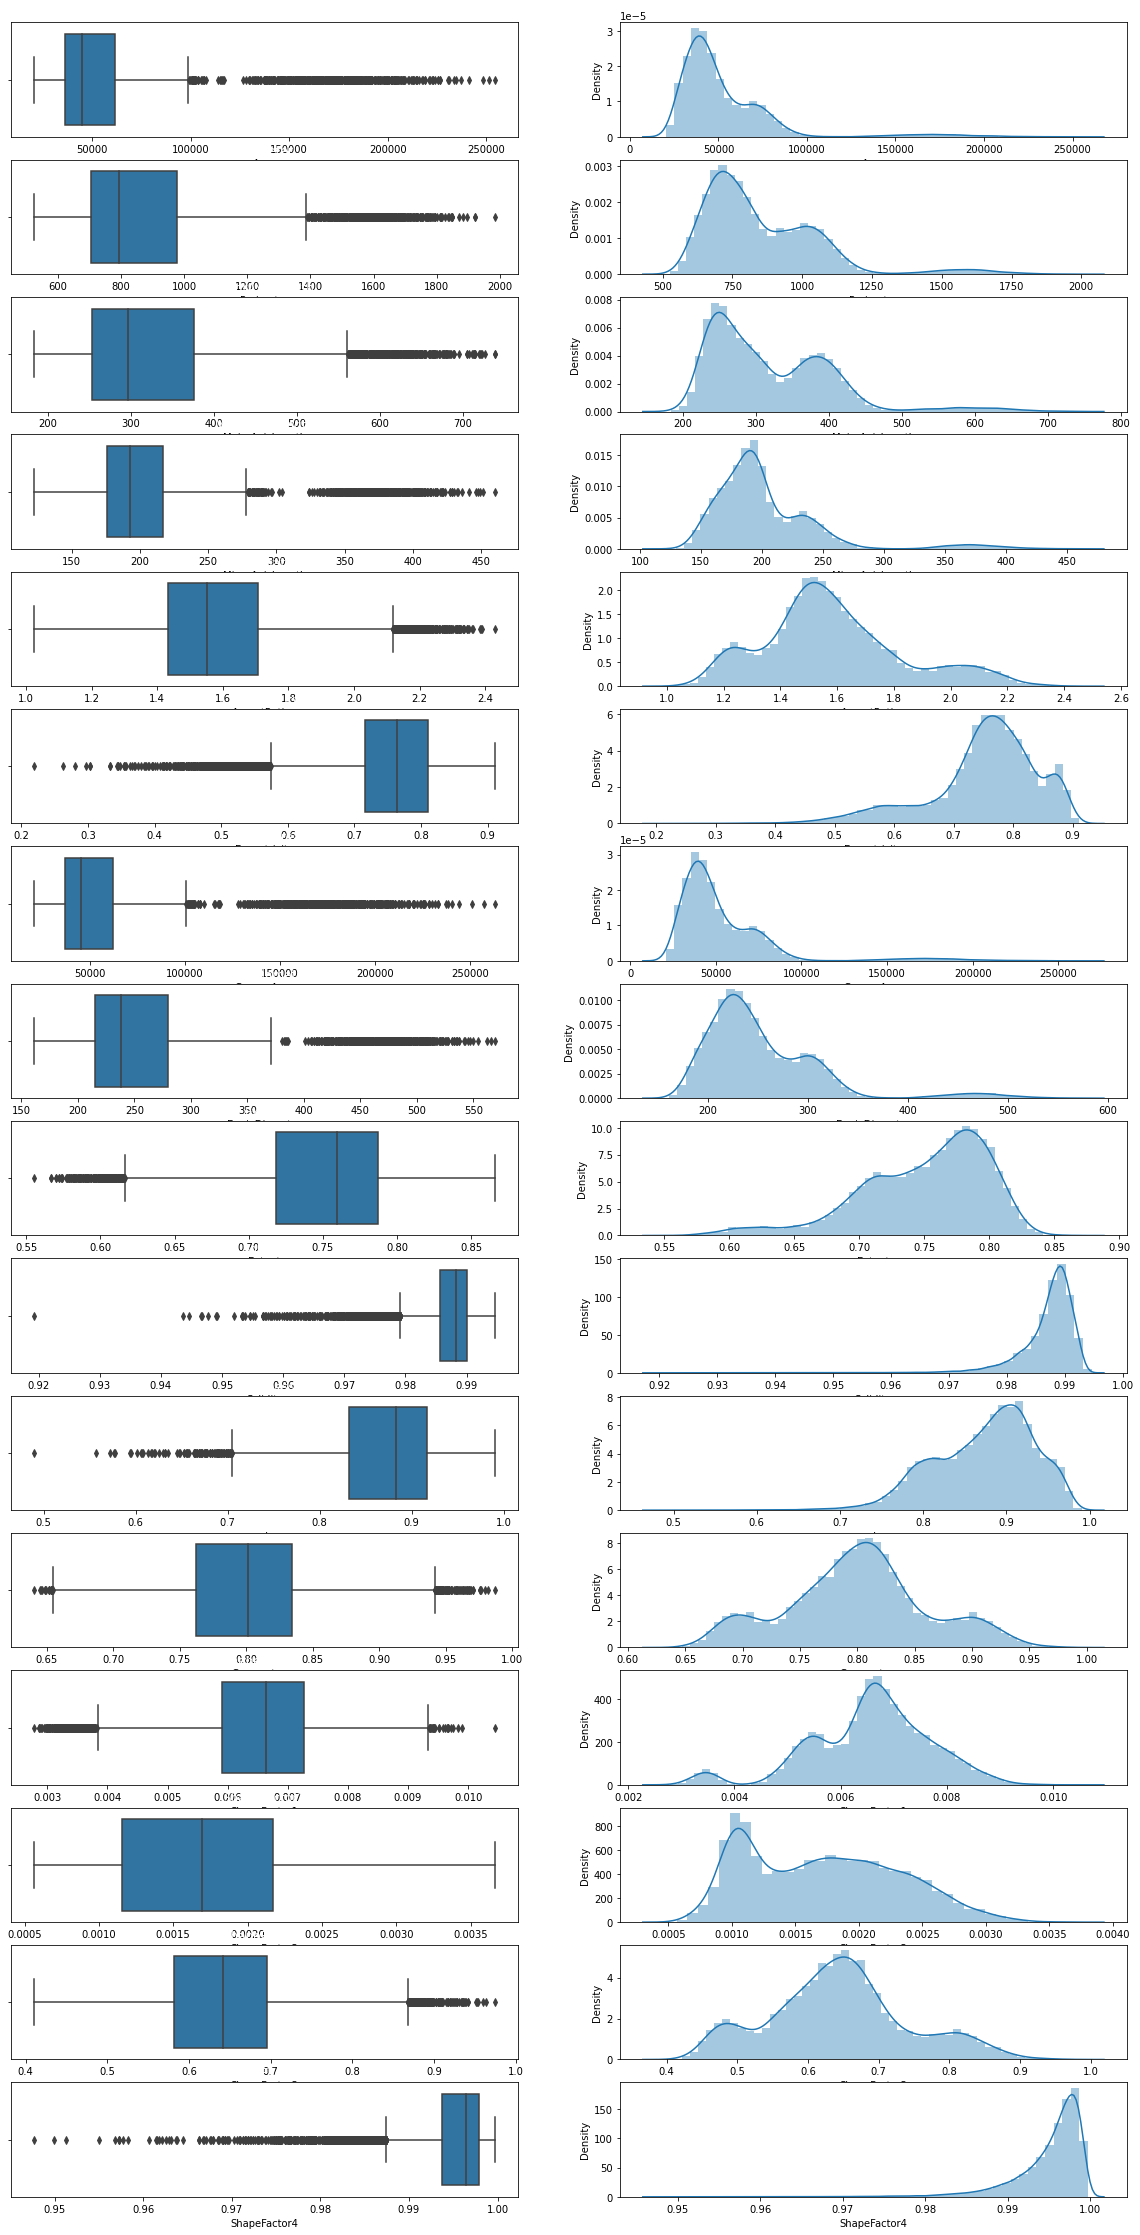

In [9]:
#plotting boxplot and distplot of each column to see outliers and distribution of data and skewness
j=1
plt.figure(figsize=(20,40))
for i in x.columns:
    plt.subplot(16,2,j)
    sns.boxplot(x[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(16,2,j)
    sns.distplot(x[i])
    j=j+1

In [10]:
x.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [11]:
# skewness of each columns of main dataframe
x.skew()

Area               2.952931
Perimeter          1.626124
MajorAxisLength    1.357815
MinorAxisLength    2.238211
AspectRation       0.582573
Eccentricity      -1.062824
ConvexArea         2.941821
EquivDiameter      1.948958
Extent            -0.895348
Solidity          -2.550093
roundness         -0.635749
Compactness        0.037115
ShapeFactor1      -0.534141
ShapeFactor2       0.301226
ShapeFactor3       0.242481
ShapeFactor4      -2.759483
dtype: float64

In [12]:
# treating the skewness with boxcox method 
l=[]
for i in x.columns:
    a=stats.boxcox(x[i])[0]
    l.append(np.array([a]))
X=pd.DataFrame(np.concatenate(l)) # (OR) X=pd.DataFrame(list(map(np.ravel, l)))


In [13]:
X=X.T

In [14]:
X.columns=x.columns

In [15]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,1.231339,0.712910,0.897720,0.541312,0.173435,-0.241698,1.229491,0.615696,-0.131834,-0.006017,-0.039086,-0.087438,-0.539321,-2.540664,-0.174876,-0.001146
1,1.231342,0.712916,0.897618,0.541316,0.091140,-0.261399,1.229494,0.615697,-0.126446,-0.006777,-0.093210,-0.046361,-0.539326,-2.522478,-0.092722,-0.001375
2,1.231347,0.712913,0.897778,0.541313,0.183071,-0.239015,1.229498,0.615699,-0.128094,-0.005835,-0.047730,-0.092110,-0.539323,-2.545246,-0.184219,-0.000863
3,1.231352,0.712917,0.897750,0.541316,0.138773,-0.250786,1.229506,0.615701,-0.126814,-0.007558,-0.081582,-0.072212,-0.539326,-2.537622,-0.144424,-0.003666
4,1.231353,0.712912,0.897636,0.541318,0.058306,-0.266995,1.229504,0.615702,-0.129457,-0.005442,-0.014740,-0.029574,-0.539330,-2.518267,-0.059149,-0.000777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,1.231421,0.712934,0.898448,0.541317,0.402251,-0.170353,1.229570,0.615730,-0.142353,-0.005615,-0.072371,-0.202509,-0.539328,-2.617050,-0.405017,-0.001410
13607,1.231421,0.712934,0.898401,0.541319,0.359822,-0.183929,1.229570,0.615730,-0.121616,-0.005487,-0.068301,-0.181235,-0.539331,-2.608086,-0.362469,-0.001534
13608,1.231421,0.712934,0.898401,0.541319,0.357595,-0.184646,1.229570,0.615730,-0.139457,-0.005741,-0.071011,-0.180738,-0.539331,-2.607931,-0.361475,-0.002478
13609,1.231421,0.712934,0.898413,0.541318,0.367204,-0.181554,1.229571,0.615730,-0.143938,-0.006260,-0.078741,-0.186228,-0.539330,-2.610262,-0.372456,-0.003255


In [16]:
#checking the skewness after boxcox, the skewness is much reduced
X.skew()

Area               0.029901
Perimeter          0.063415
MajorAxisLength    0.076429
MinorAxisLength   -0.005501
AspectRation       0.004314
Eccentricity      -0.090440
ConvexArea         0.032522
EquivDiameter      0.029901
Extent            -0.102335
Solidity          -0.134842
roundness         -0.067434
Compactness       -0.004883
ShapeFactor1       0.006508
ShapeFactor2      -0.043011
ShapeFactor3      -0.004883
ShapeFactor4      -0.300440
dtype: float64

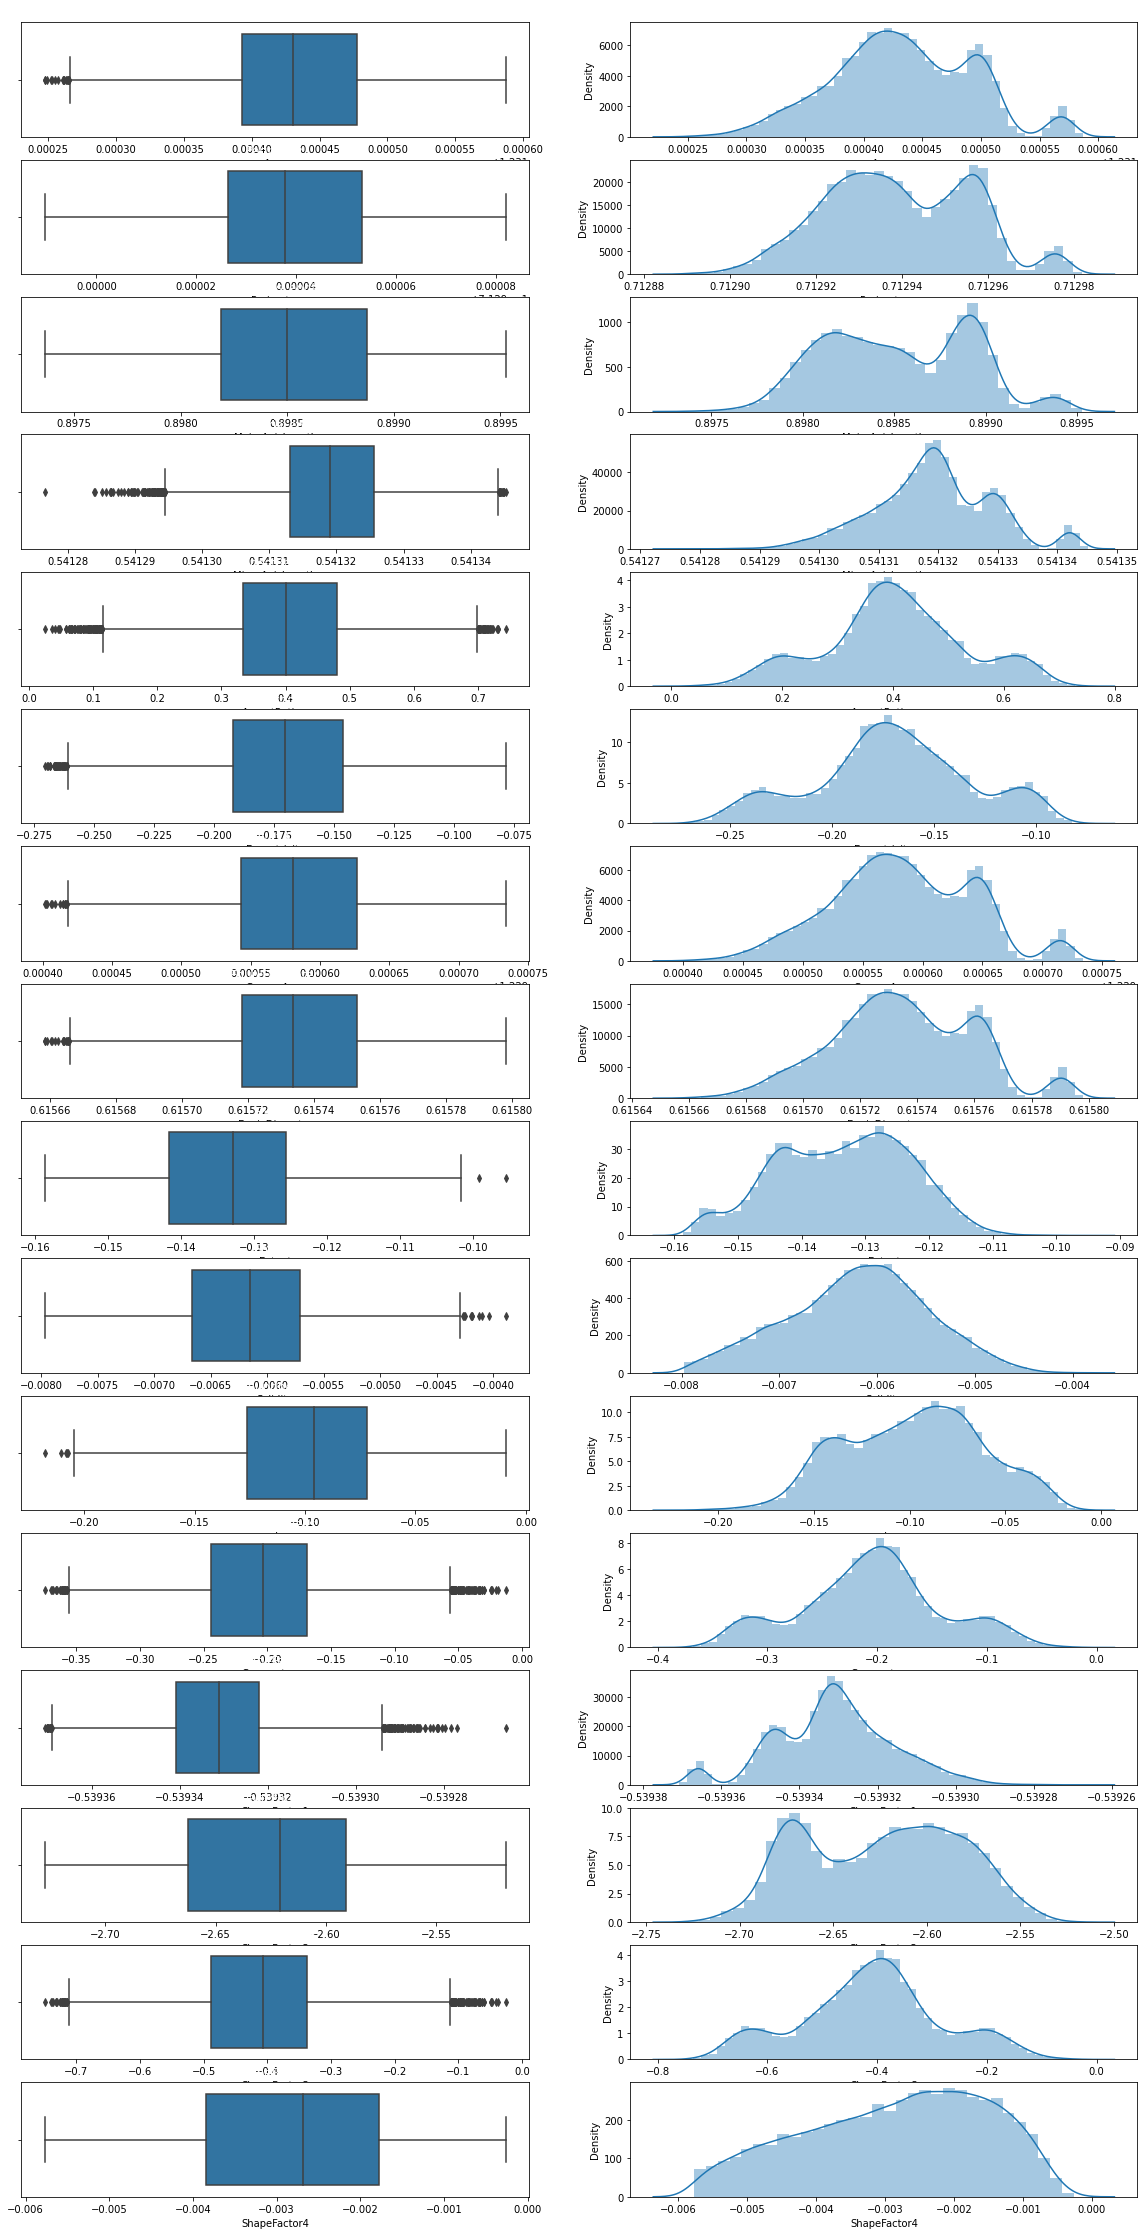

In [17]:
#plotting the boxplot and distplot to see outliers and skewness after applying boxcox
j=1
plt.figure(figsize=(20,40))
for i in X.columns:
    plt.subplot(16,2,j)
    sns.boxplot(X[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(16,2,j)
    sns.distplot(X[i])
    j=j+1

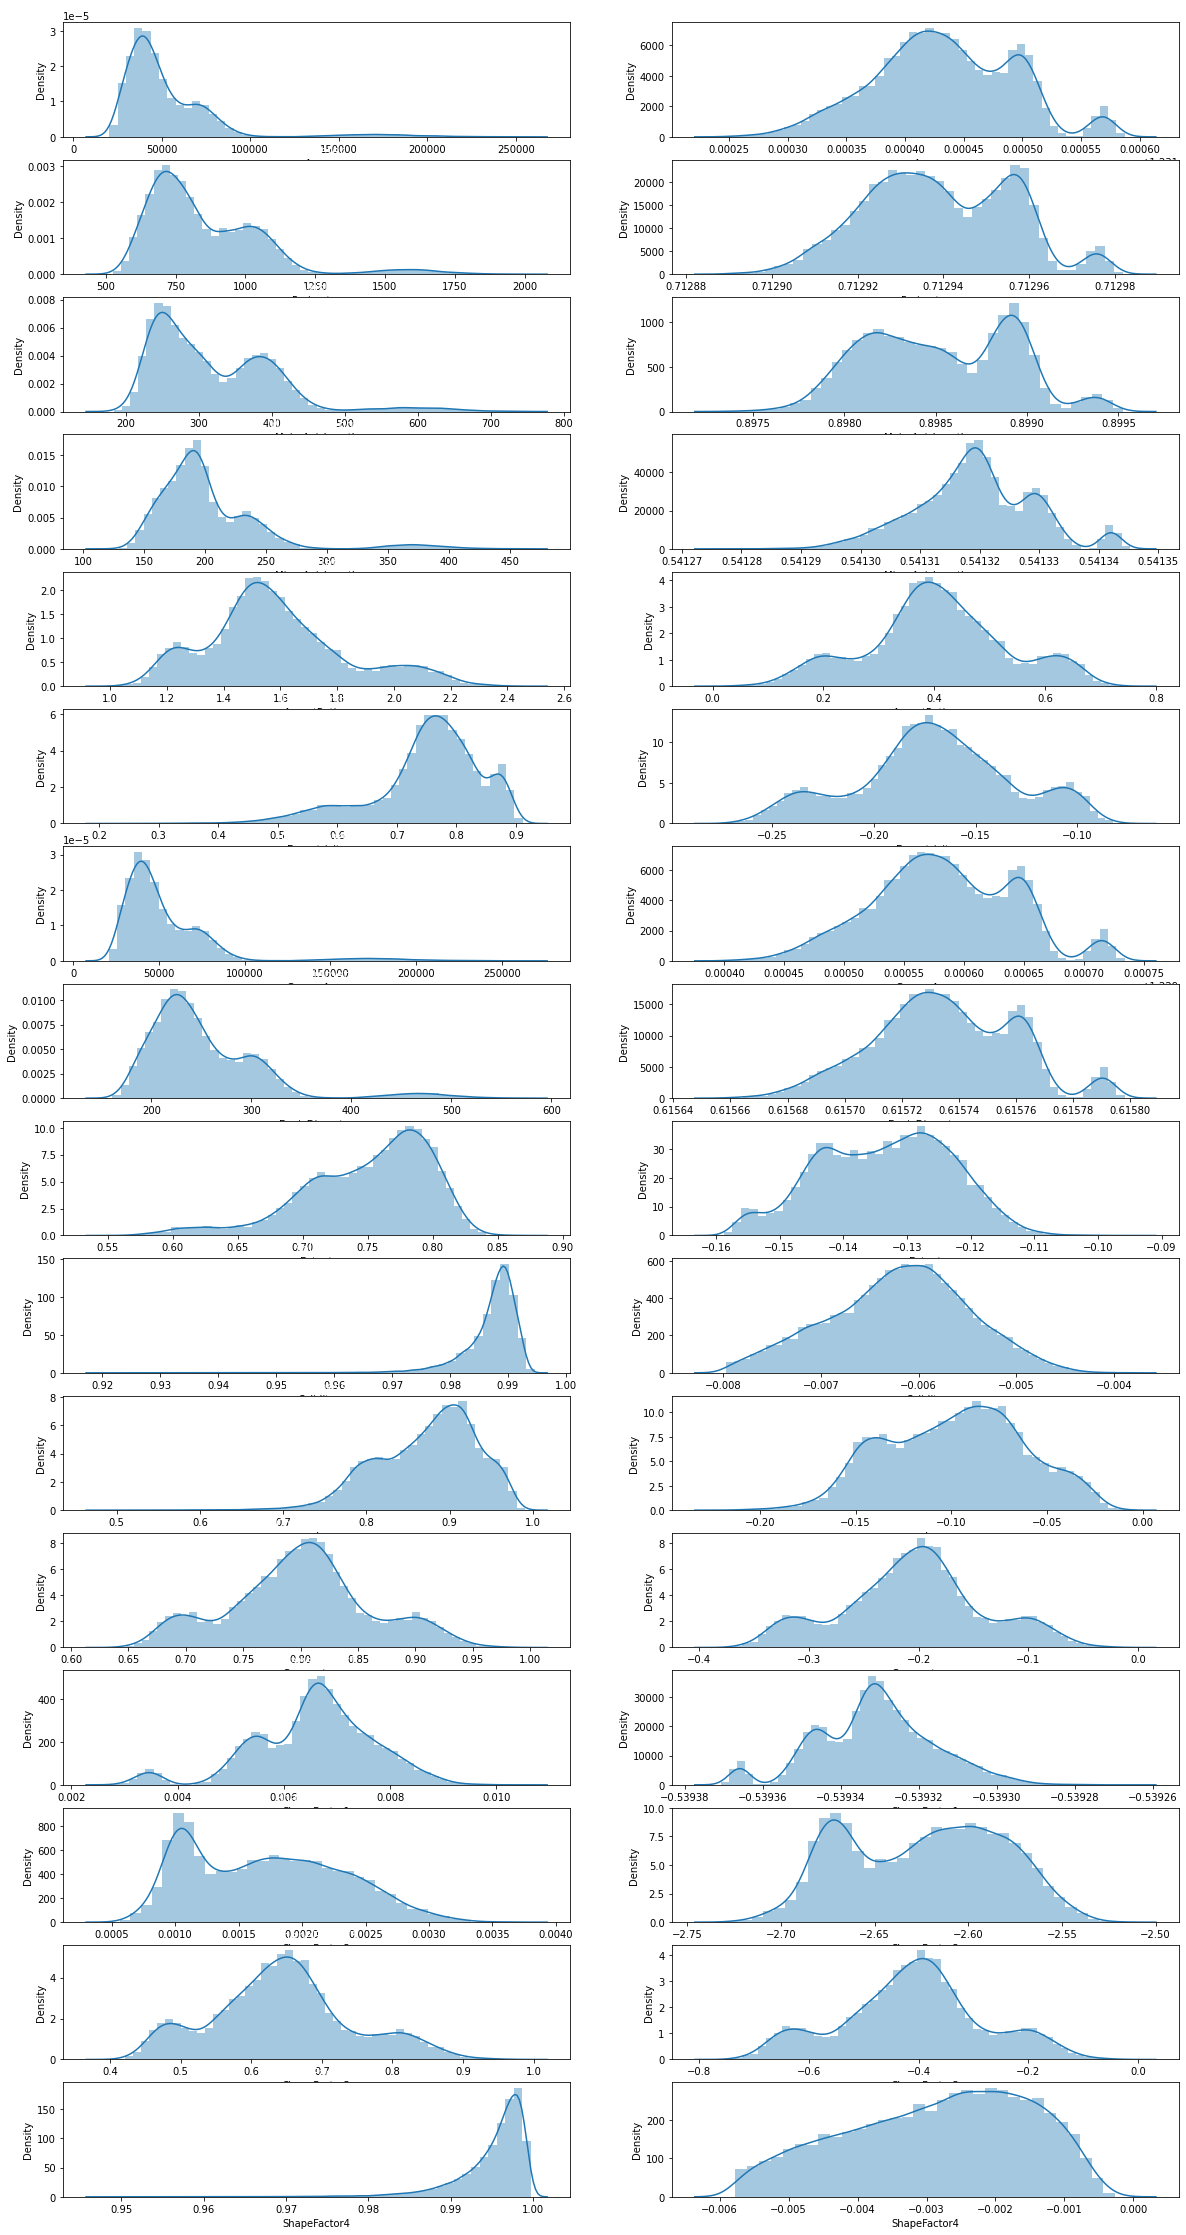

In [18]:
# comparing the distribution of data before and after boxcox
j=1
plt.figure(figsize=(20,40))
for i in X.columns:
    plt.subplot(16,2,j)
    sns.distplot(x[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(16,2,j)
    sns.distplot(X[i])
    j=j+1

In [19]:
#applying log function to reduce skewness
l2=[]
for i in x.columns:
    a=np.log(x[i])
    l2.append(np.array([a]))
X2=pd.DataFrame(np.concatenate(l2))

In [20]:
X2=X2.T

In [21]:
X2.columns=x.columns
#checking the skwness after log function, skewness is reduced but not as much as boxcox did.
X2.skew()

Area               1.071374
Perimeter          0.842886
MajorAxisLength    0.629485
MinorAxisLength    1.308713
AspectRation       0.175051
Eccentricity      -1.630537
ConvexArea         1.066049
EquivDiameter      1.071374
Extent            -1.094230
Solidity          -2.611098
roundness         -0.876845
Compactness       -0.167905
ShapeFactor1      -1.310746
ShapeFactor2      -0.218269
ShapeFactor3      -0.167905
ShapeFactor4      -2.809663
dtype: float64

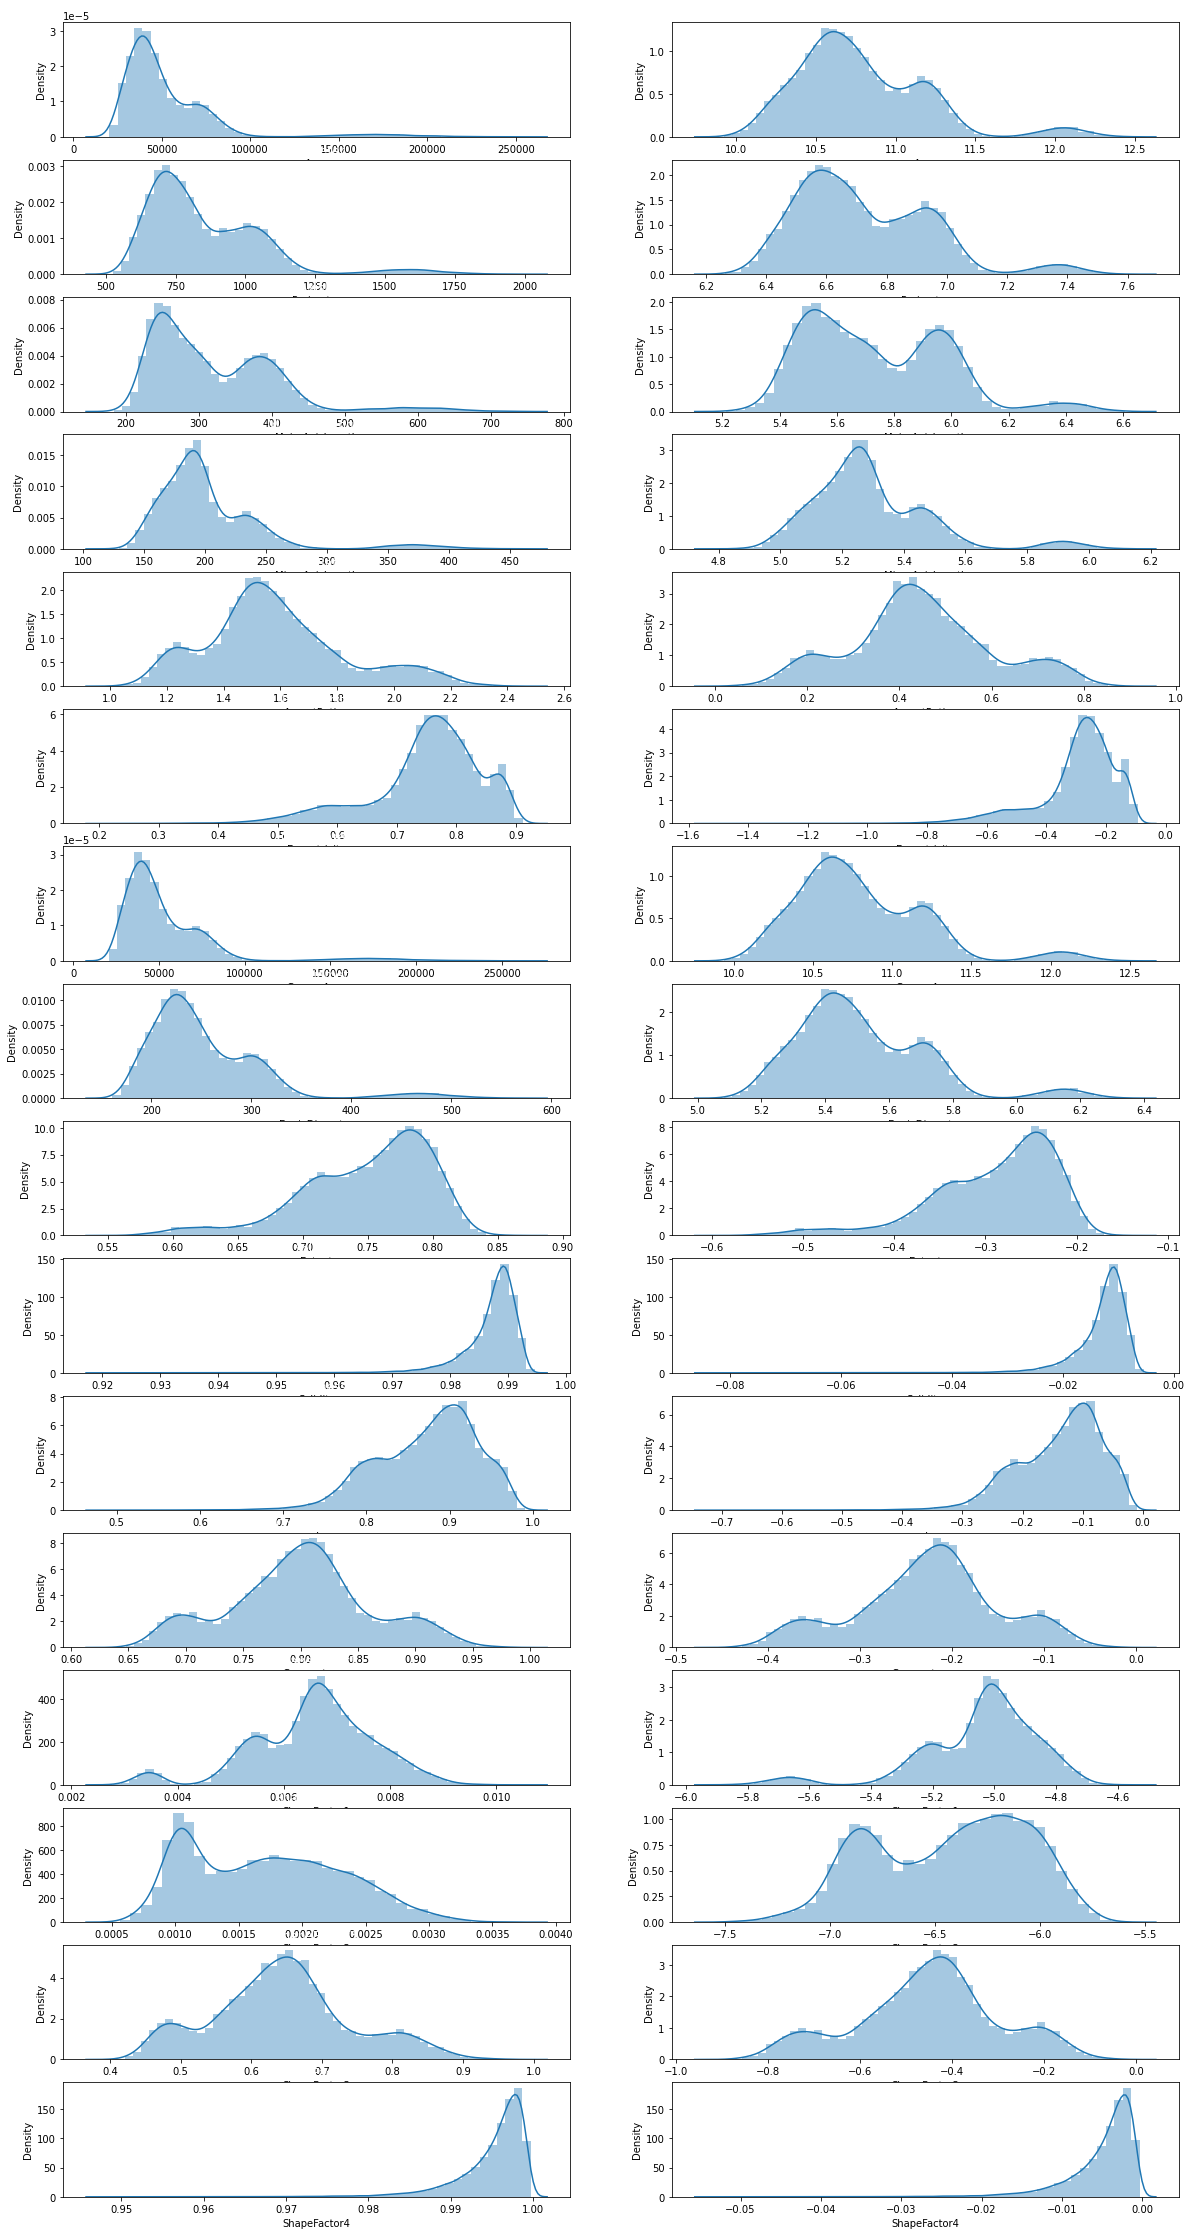

In [22]:
# comparing the distribution of data before and after applying log
j=1
plt.figure(figsize=(20,40))
for i in X2.columns:
    plt.subplot(16,2,j)
    sns.distplot(x[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(16,2,j)
    sns.distplot(X2[i])
    j=j+1

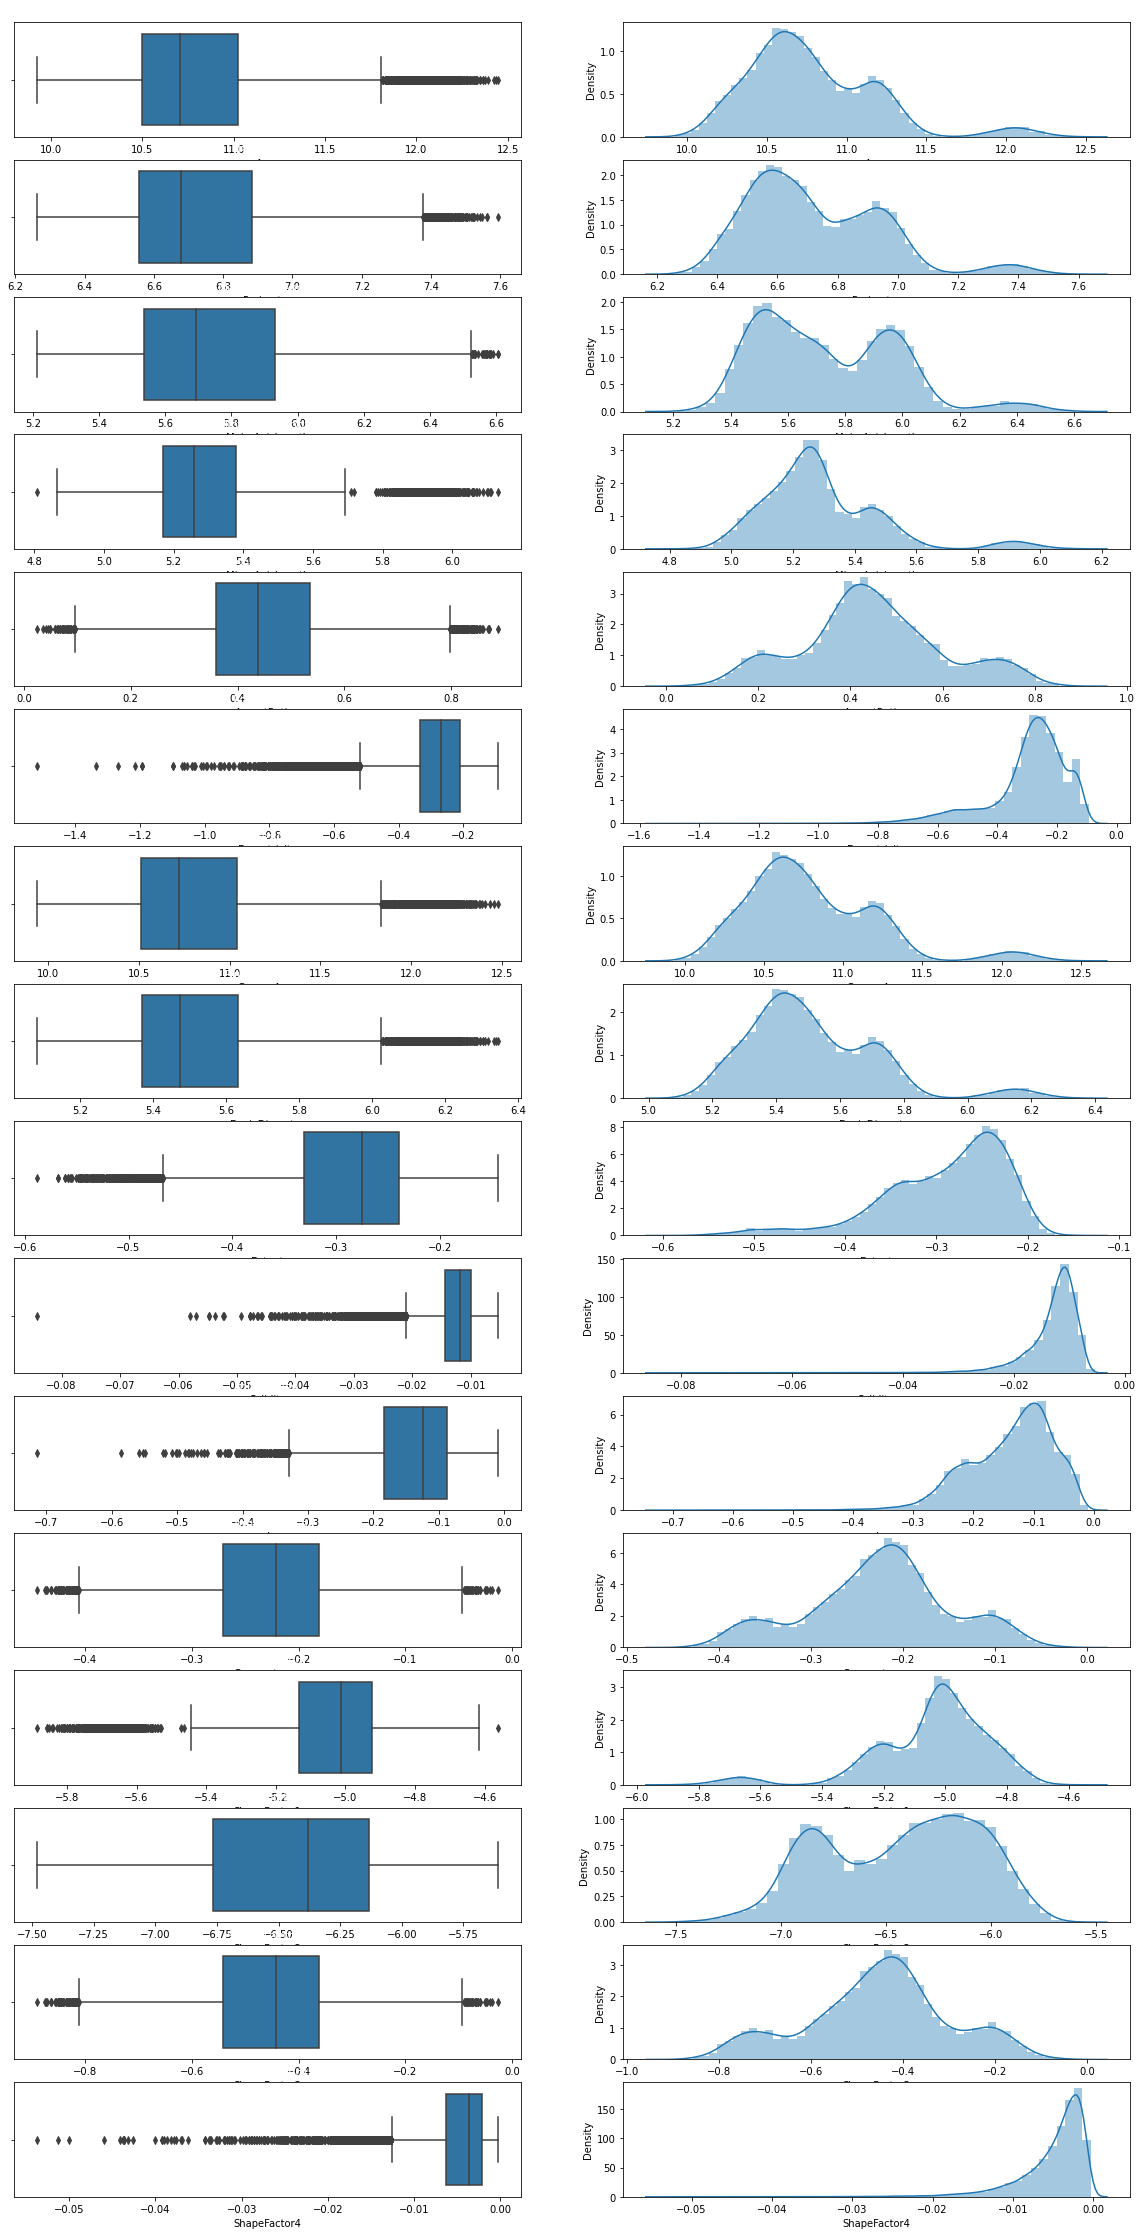

In [23]:
#plotting boxplot and distributon plot, as the outliers are not get treated in this log function
j=1
plt.figure(figsize=(20,40))
for i in X2.columns:
    plt.subplot(16,2,j)
    sns.boxplot(X2[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(16,2,j)
    sns.distplot(X2[i])
    j=j+1

In [24]:
# applyin sqrt function to reduce skewness
l3=[]
for i in x.columns:
    a=np.sqrt(x[i])
    l3.append(np.array([a]))
X3=pd.DataFrame(np.concatenate(l3))

In [25]:
X3=X3.T
X3.columns=x.columns


In [26]:
#checking skewness after applying sqrt, the result is same as log function did.
X3.skew()

Area               1.948958
Perimeter          1.206611
MajorAxisLength    0.959378
MinorAxisLength    1.758289
AspectRation       0.380017
Eccentricity      -1.318545
ConvexArea         1.938574
EquivDiameter      1.487483
Extent            -0.992517
Solidity          -2.580246
roundness         -0.749046
Compactness       -0.065516
ShapeFactor1      -0.901428
ShapeFactor2       0.041153
ShapeFactor3       0.037115
ShapeFactor4      -2.784385
dtype: float64

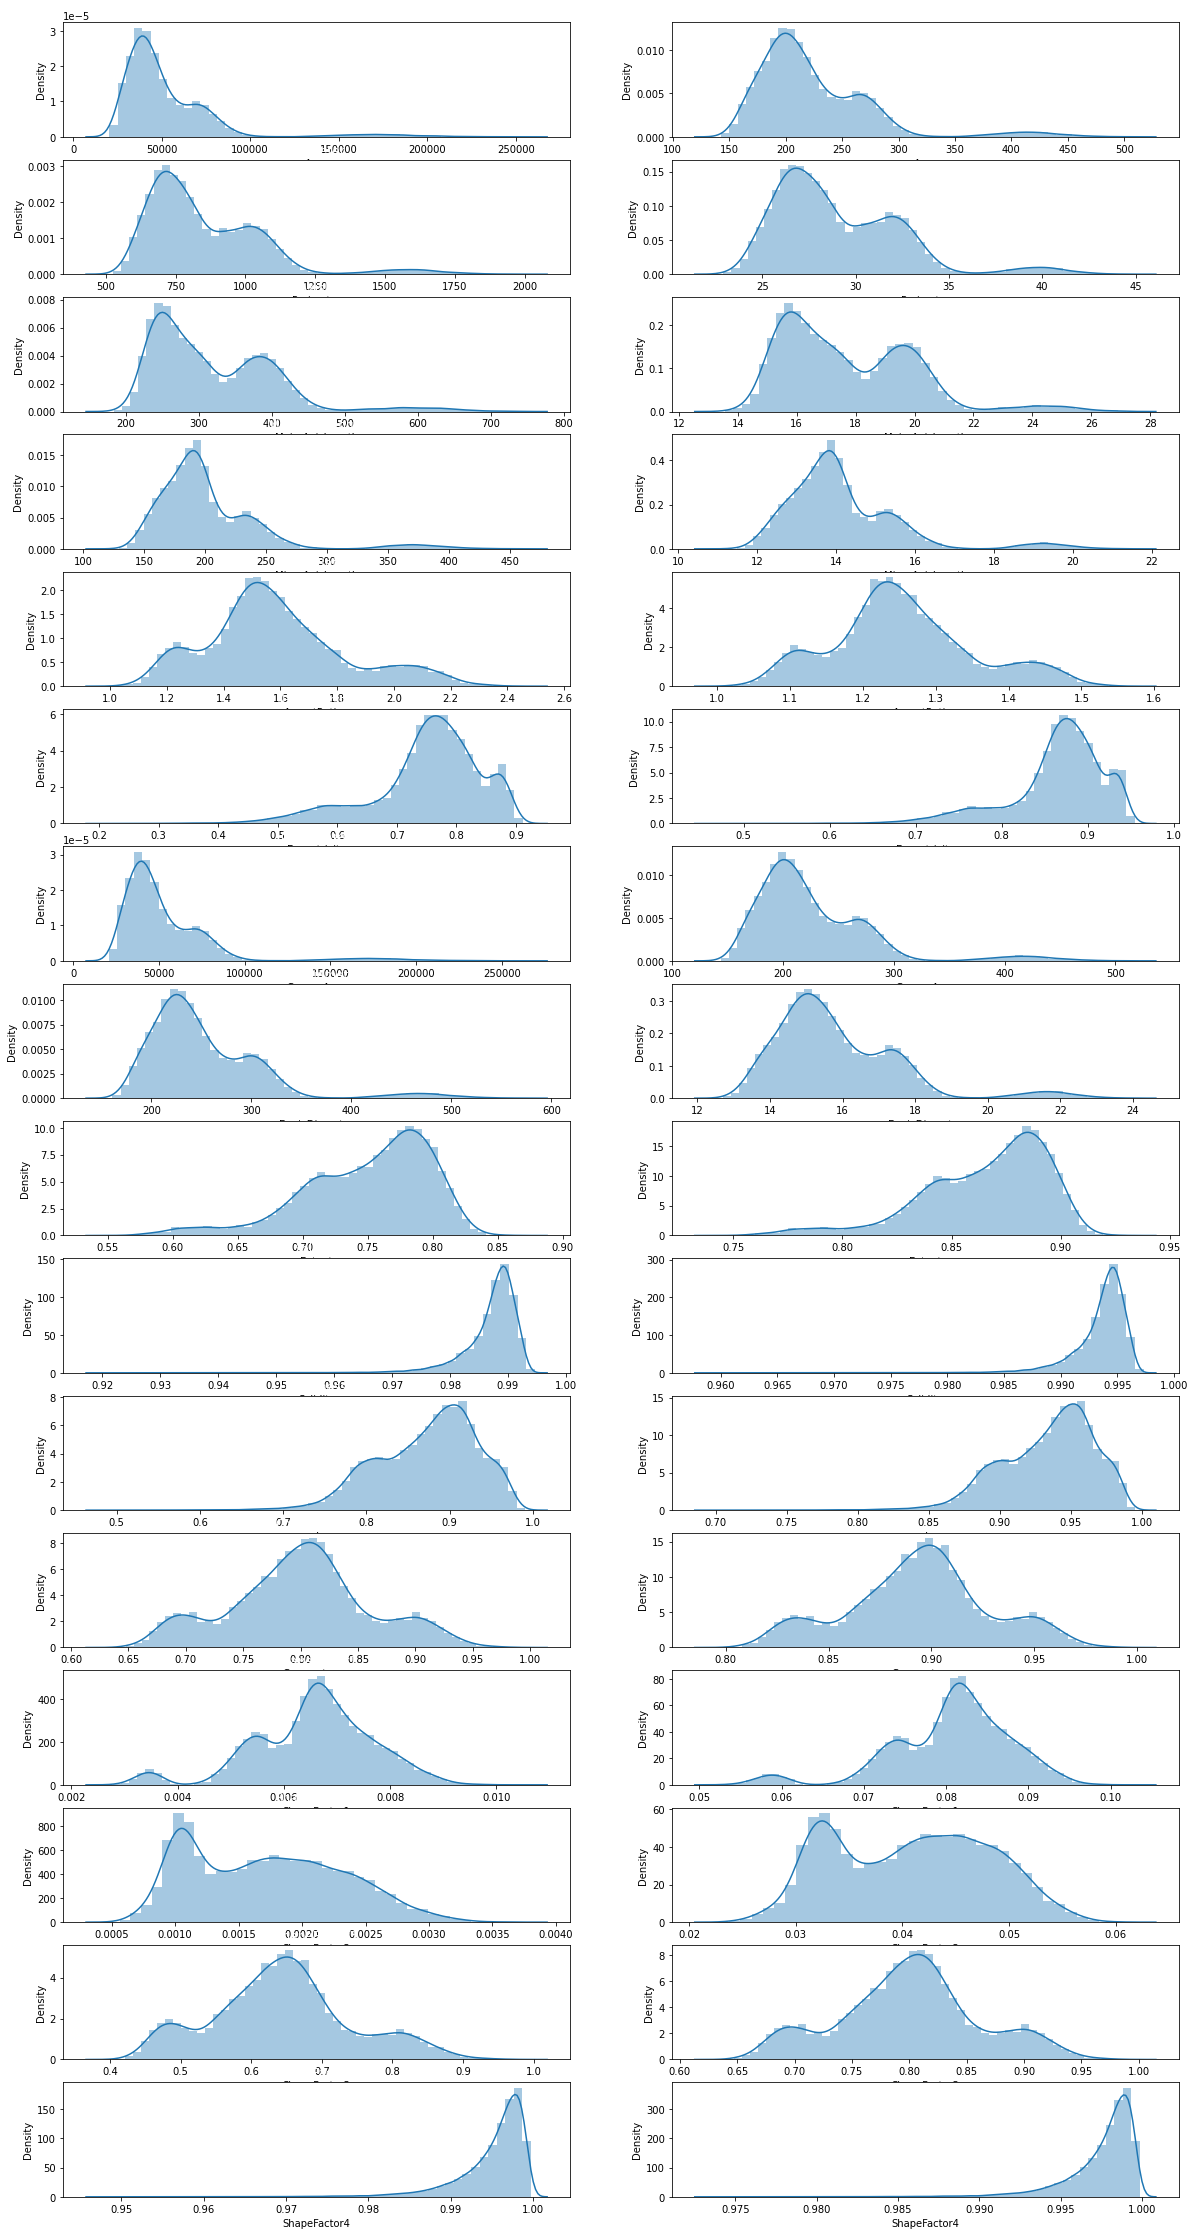

In [27]:
# comparing the plots before and after the sqrt 
j=1
plt.figure(figsize=(20,40))
for i in X3.columns:
    plt.subplot(16,2,j)
    sns.distplot(x[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(16,2,j)
    sns.distplot(X3[i])
    j=j+1

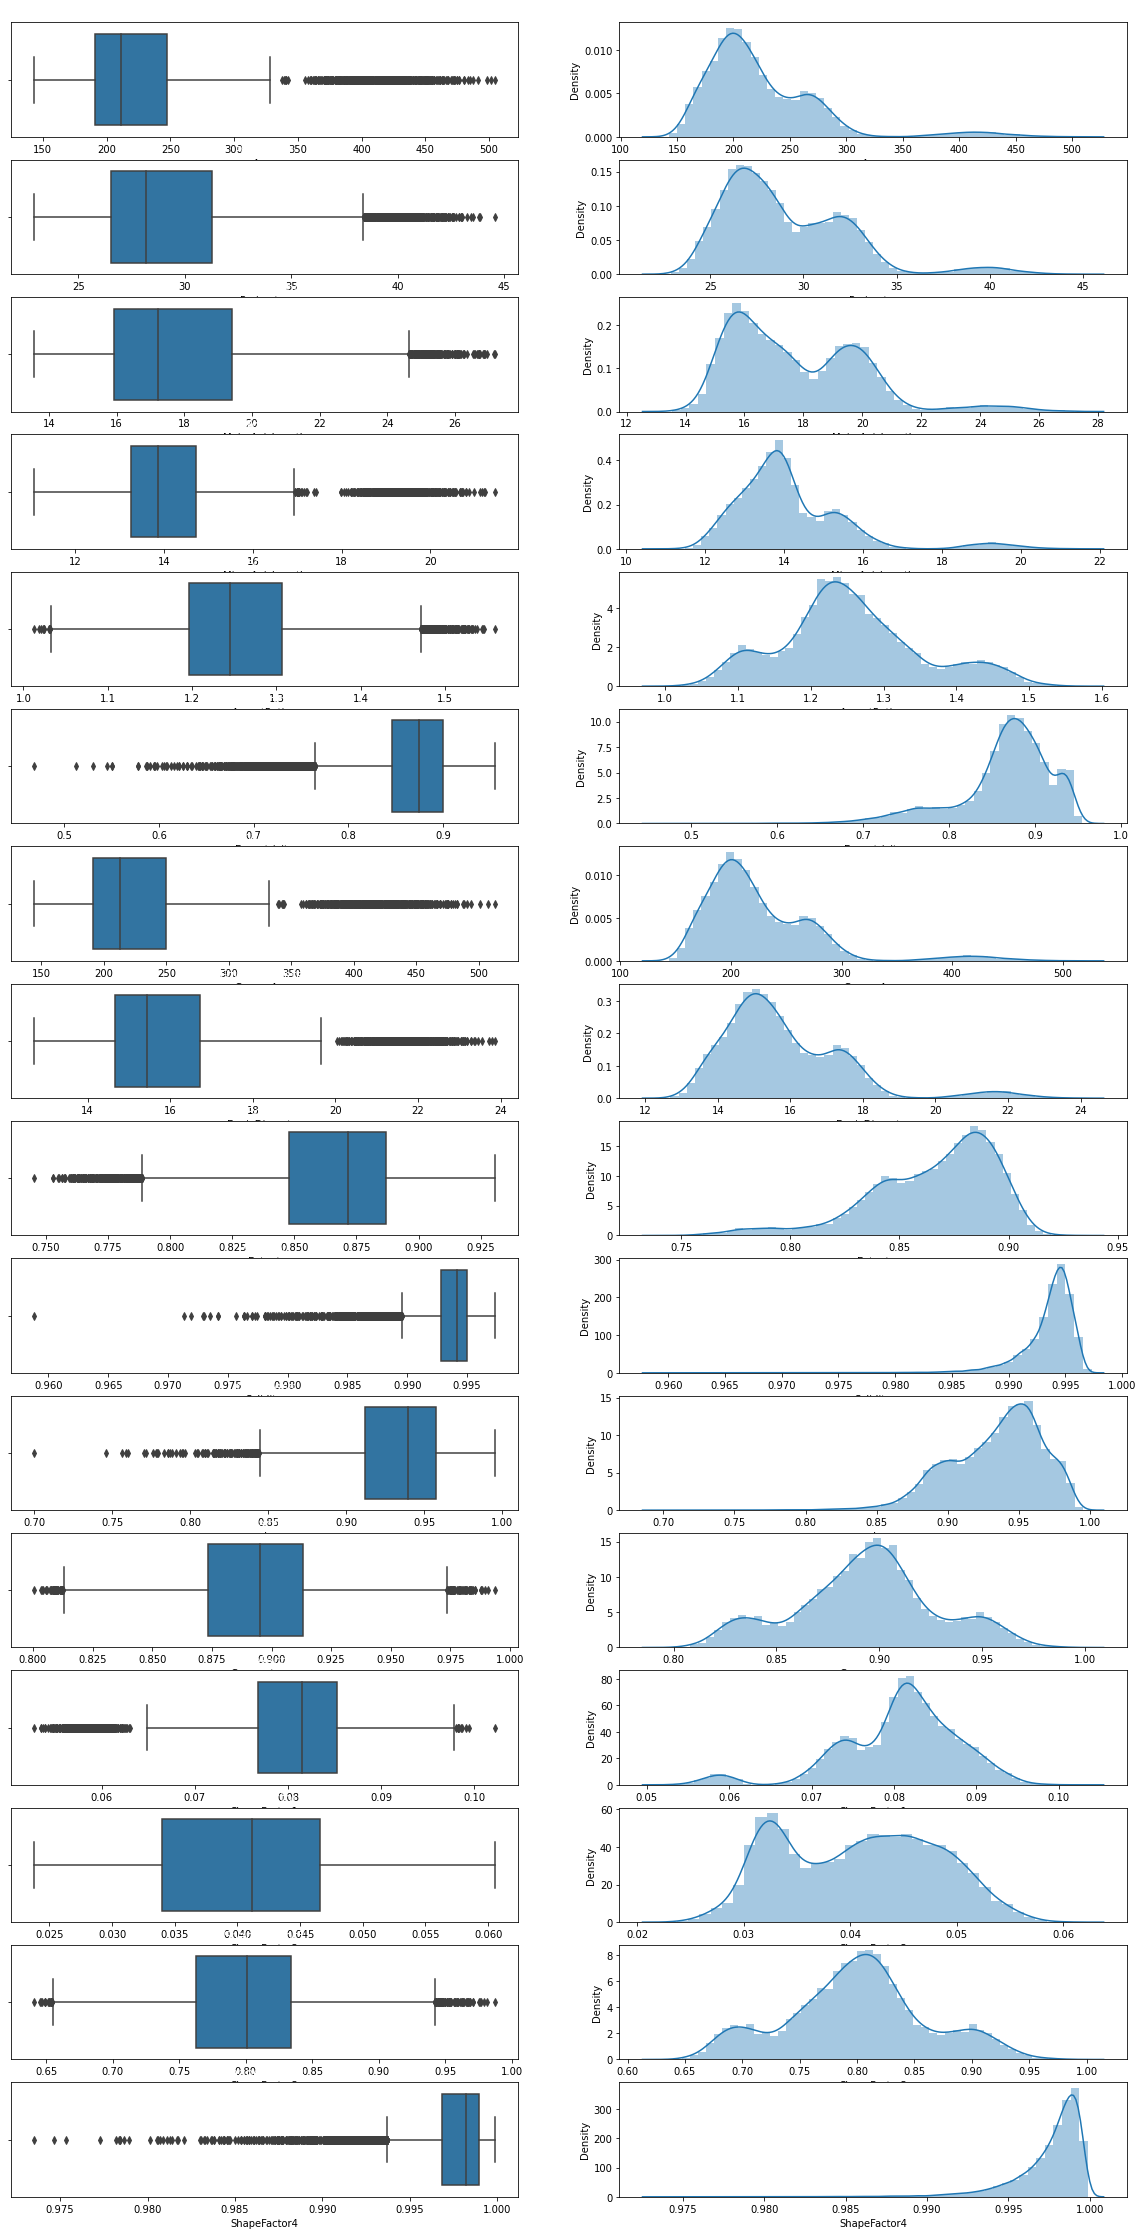

In [28]:
#plotting boxplot and distplot to check outliers, in this too outliers are not treated as much
j=1
plt.figure(figsize=(20,40))
for i in X3.columns:
    plt.subplot(16,2,j)
    sns.boxplot(X3[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(16,2,j)
    sns.distplot(X3[i])
    j=j+1

In [29]:
#checking imbalance dataset or not 
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

# Handiling imbalance data

In [30]:
smote=SMOTEENN() 
X,y=smote.fit_resample(X,y1)   

In [31]:
smote=SMOTEENN() 
X2,y2=smote.fit_resample(X2,y1)

# Splitting of dataframe into taining and testing

In [32]:
#train test split for boxcox skewed dataframe
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [33]:
#train test split for log skewed dataframe
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X2,y2,test_size=0.3)

# Model building

### Building models for Boxcox method

In [34]:
#hyperparameter tuning for logisticRegression
g_log=GridSearchCV(LogisticRegression(),{
    'C':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
})
g_log.fit(X,y)
a=g_log.best_params_
a

{'C': 15}

In [35]:
#LogisticRegression
log=LogisticRegression(C=a['C'])
log.fit(X_train,y_train)
y_pred_log = log.predict(X_test)


In [36]:
#Training dataset accuracy
y_pred_train=log.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.883812856402281

[[895   2  38   0   4  19  33]
 [  3 981  28   0  10   6   0]
 [  9  34 843   0  59   0  61]
 [ 18   0   3 673   0  21  95]
 [  8   0  52   0 917   0   0]
 [  7   0   0  26   0 951   0]
 [ 15   0 112 146   0   0 545]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       991
           1       0.96      0.95      0.96      1028
           2       0.78      0.84      0.81      1006
           3       0.80      0.83      0.81       810
           4       0.93      0.94      0.93       977
           5       0.95      0.97      0.96       984
           6       0.74      0.67      0.70       818

    accuracy                           0.88      6614
   macro avg       0.87      0.87      0.87      6614
weighted avg       0.88      0.88      0.88      6614



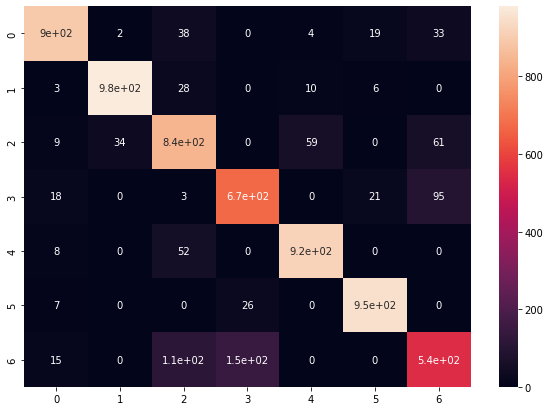

In [37]:
cm_log = confusion_matrix(y_test,y_pred_log)
plt.figure(figsize=(10,7))
print(cm_log)
print(sns.heatmap(cm_log , annot=True))
print(classification_report(y_test,y_pred_log) )

In [38]:
#hyperparameter tuning for DecessionTreeClassifier
g_dtc=GridSearchCV(DecisionTreeClassifier(),{
    "criterion":['gini', 'entropy','log_loss'],"splitter":["best", 'random']
    })
g_dtc.fit(X,y)
a=g_dtc.best_params_
a

{'criterion': 'entropy', 'splitter': 'best'}

In [39]:
#DecessionTreeClassifier
dtc=DecisionTreeClassifier(criterion=a['criterion'],splitter=a['splitter'])
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)


In [40]:
#Training dataset accuracy
y_pred_train=dtc.predict(X_train)
accuracy_score(y_train,y_pred_train)

1.0

[[ 971    0   14    0    1    3    2]
 [   0 1028    0    0    0    0    0]
 [  26    0  969    0   11    0    0]
 [   0    0    0  796    0    6    8]
 [   2    0    4    0  966    0    5]
 [   1    0    0    0    0  982    1]
 [   1    0    0   12    7    1  797]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       991
           1       1.00      1.00      1.00      1028
           2       0.98      0.96      0.97      1006
           3       0.99      0.98      0.98       810
           4       0.98      0.99      0.98       977
           5       0.99      1.00      0.99       984
           6       0.98      0.97      0.98       818

    accuracy                           0.98      6614
   macro avg       0.98      0.98      0.98      6614
weighted avg       0.98      0.98      0.98      6614



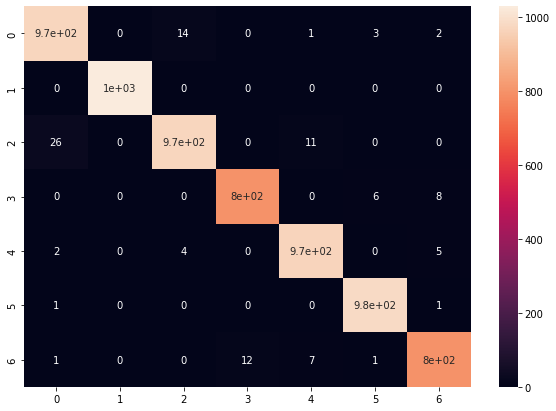

In [41]:
cm_dtc = confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(10,7))
print(cm_dtc)
print(sns.heatmap(cm_dtc , annot=True))
print(classification_report(y_test,y_pred_dtc))

In [42]:
#hyperparameter tuning for KNNClassifier
g_knn=GridSearchCV(KNeighborsClassifier(),{
    "n_neighbors":[1,2,3,4.5,6,7,8,9,10],'weights':['uniform','distance']
})
g_knn.fit(X,y)
a=g_knn.best_params_
a

{'n_neighbors': 1, 'weights': 'uniform'}

In [43]:
#KNNClassifier
knn = KNeighborsClassifier(n_neighbors=a['n_neighbors'],weights=a['weights'])
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [44]:
#Training dataset accuracy
y_pred_train=knn.predict(X_train)
accuracy_score(y_train,y_pred_train)

1.0

[[ 990    0    1    0    0    0    0]
 [   0 1028    0    0    0    0    0]
 [   0    0 1006    0    0    0    0]
 [   0    0    0  809    0    0    1]
 [   0    0    0    0  976    0    1]
 [   1    0    0    0    0  983    0]
 [   0    0    0    1    1    0  816]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       991
           1       1.00      1.00      1.00      1028
           2       1.00      1.00      1.00      1006
           3       1.00      1.00      1.00       810
           4       1.00      1.00      1.00       977
           5       1.00      1.00      1.00       984
           6       1.00      1.00      1.00       818

    accuracy                           1.00      6614
   macro avg       1.00      1.00      1.00      6614
weighted avg       1.00      1.00      1.00      6614



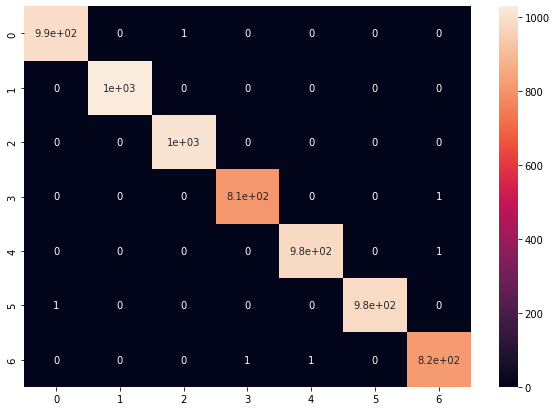

In [45]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize=(10,7))
print(cm_knn)
print(sns.heatmap(cm_knn , annot=True))
print(classification_report(y_test,y_pred_knn) )

In [46]:
#NaiveBayes Classifier
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_pred_GNB = GNB.predict(X_test)


In [47]:
#Training dataset accuracy
y_pred_train=GNB.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.9608605495075169

[[ 854    0  101    0    3    2   31]
 [   1 1027    0    0    0    0    0]
 [  63    1  935    0    7    0    0]
 [   0    0    0  795    0    4   11]
 [   5    0    9    2  957    0    4]
 [   0    0    0    1    0  977    6]
 [   0    0    0   19    7    1  791]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       991
           1       1.00      1.00      1.00      1028
           2       0.89      0.93      0.91      1006
           3       0.97      0.98      0.98       810
           4       0.98      0.98      0.98       977
           5       0.99      0.99      0.99       984
           6       0.94      0.97      0.95       818

    accuracy                           0.96      6614
   macro avg       0.96      0.96      0.96      6614
weighted avg       0.96      0.96      0.96      6614



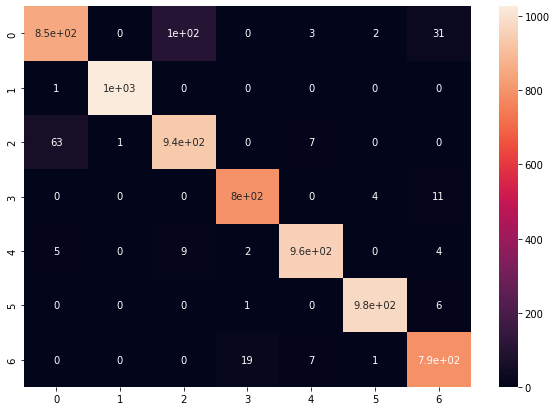

In [48]:
cm_GNB = confusion_matrix(y_test,y_pred_GNB)
plt.figure(figsize=(10,7))
print(cm_GNB)
print(sns.heatmap(cm_GNB , annot=True))
print(classification_report(y_test,y_pred_GNB) )

In [49]:
#hyperparameter tuning for RandomforestClassifier
g_rfc=GridSearchCV(RandomForestClassifier(),{
    "criterion":['gini', 'entropy','log_loss']
    })
g_rfc.fit(X,y)
a=g_rfc.best_params_
a

{'criterion': 'log_loss'}

In [50]:
rfc=RandomForestClassifier(criterion=a['criterion'])
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test) 

In [51]:
#Training dataset accuracy
y_pred_train=rfc.predict(X_train) 
accuracy_score(y_train,y_pred_train)  

1.0

[[ 979    0    6    0    2    1    3]
 [   0 1028    0    0    0    0    0]
 [   7    0  992    0    7    0    0]
 [   0    0    0  806    0    1    3]
 [   0    0    1    0  973    0    3]
 [   1    0    0    0    0  983    0]
 [   1    0    0   14    3    0  800]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       991
           1       1.00      1.00      1.00      1028
           2       0.99      0.99      0.99      1006
           3       0.98      1.00      0.99       810
           4       0.99      1.00      0.99       977
           5       1.00      1.00      1.00       984
           6       0.99      0.98      0.98       818

    accuracy                           0.99      6614
   macro avg       0.99      0.99      0.99      6614
weighted avg       0.99      0.99      0.99      6614



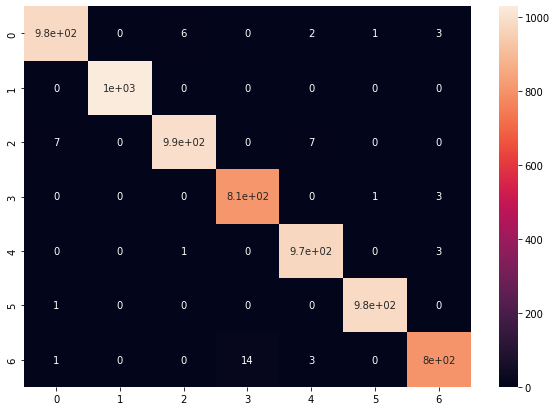

In [52]:
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(10,7))
print(cm_rfc)
print(sns.heatmap(cm_rfc , annot=True))
print(classification_report(y_test,y_pred_rfc))

Accuracies of different models with Boxcox method                                                                                                                                                                      
LogisticRegression-------------------90%                                                                
DecessionTreeClassifier--------------98%                                                             
GausianNaivebayes--------------------95%                                                     
KNN Classifier-----------------------100%                                                           
RandomForestClassifier---------------99%                                         


### Building models for Log method

In [53]:
g_rfc=GridSearchCV(RandomForestClassifier(),{
    "criterion":['gini', 'entropy','log_loss']
    })
g_rfc.fit(X2,y2)
a=g_rfc.best_params_
a

{'criterion': 'entropy'}

In [54]:
rfc=RandomForestClassifier(criterion=a['criterion'])
rfc.fit(X_train_2,y_train_2)
y_pred_rfc=rfc.predict(X_test_2)

In [55]:
#Training dataset accuracy
y_pred_train=rfc.predict(X_train_2)
accuracy_score(y_train_2,y_pred_train)

1.0

[[ 956    0    3    0    0    0    1]
 [   0 1033    0    0    0    0    0]
 [   7    0  960    0    6    0    2]
 [   0    0    0  853    0    0    7]
 [   0    0    2    0 1004    0    0]
 [   0    0    0    0    0  959    1]
 [   3    0    0    7    0    1  787]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       960
           1       1.00      1.00      1.00      1033
           2       0.99      0.98      0.99       975
           3       0.99      0.99      0.99       860
           4       0.99      1.00      1.00      1006
           5       1.00      1.00      1.00       960
           6       0.99      0.99      0.99       798

    accuracy                           0.99      6592
   macro avg       0.99      0.99      0.99      6592
weighted avg       0.99      0.99      0.99      6592



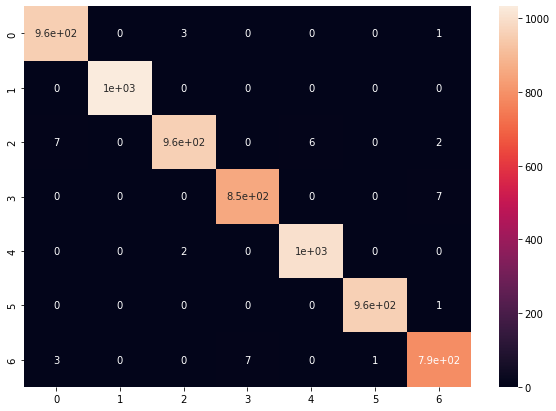

In [56]:
cm_rfc = confusion_matrix(y_test_2,y_pred_rfc)
plt.figure(figsize=(10,7))
print(cm_rfc)
print(sns.heatmap(cm_rfc , annot=True))
print(classification_report(y_test_2,y_pred_rfc))

In [57]:
#hyperparameter tuning for KNNClassifier
g_knn=GridSearchCV(KNeighborsClassifier(),{
    "n_neighbors":[1,2,3,4.5,6,7,8,9,10],'weights':['uniform','distance']
})
g_knn.fit(X2,y2)
a=g_knn.best_params_
a

{'n_neighbors': 1, 'weights': 'uniform'}

In [58]:
#KNNClassifier
knn = KNeighborsClassifier(n_neighbors=a['n_neighbors'],weights=a['weights'])
knn.fit(X_train_2,y_train_2)
y_pred_knn = knn.predict(X_test_2) 

In [59]:
#Training dataset accuracy
y_pred_train=knn.predict(X_train_2)
accuracy_score(y_train_2,y_pred_train)

1.0

[[ 959    0    1    0    0    0    0]
 [   0 1033    0    0    0    0    0]
 [   0    0  973    0    2    0    0]
 [   0    0    0  854    0    0    6]
 [   0    0    0    0 1005    0    1]
 [   0    0    0    0    0  960    0]
 [   1    0    0    1    0    1  795]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       1.00      1.00      1.00      1033
           2       1.00      1.00      1.00       975
           3       1.00      0.99      1.00       860
           4       1.00      1.00      1.00      1006
           5       1.00      1.00      1.00       960
           6       0.99      1.00      0.99       798

    accuracy                           1.00      6592
   macro avg       1.00      1.00      1.00      6592
weighted avg       1.00      1.00      1.00      6592



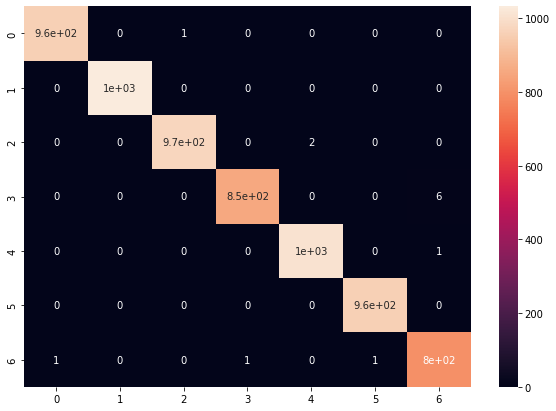

In [60]:
cm_knn = confusion_matrix(y_test_2,y_pred_knn)
plt.figure(figsize=(10,7))
print(cm_knn)
print(sns.heatmap(cm_knn , annot=True))
print(classification_report(y_test_2,y_pred_knn)) 

I had done all the models for boxcox skewed data because the skewness and outlier treatment is handled in that. 
so due to that i had selected most 2 accuracy model and applied for log skewed data to check the accuracy.

Accuracies of different models with log method                                                                                  
KNN Classifier-----------------------100%                                                                 
RandomForestClassifier---------------99%

as a result the accuracy getting for boxcox and log are almost same i.e 98 to 100%,                    
and also the train dataset accuracy is 100% for KNN and Randomforest.                                     
And in log and sqrt the outliers are not treated well and skewness is more as compared to boxcox,           
but still gives the same accuracy as like a Boxcox gives.